# Problem 1

### Getting familiar with loading, visualizing and operating on multivariate data

A Hess diagram is a 2D plot coded by a third quantity.

Here's an example from the [astroML documentation](https://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html) showing the temperature and surface gravity (how strongly the star would pull on you if you could stand on it's surface, including the effect of rotation), color coded on the left by density, and on the right by metallicity (measured here as the ratio of iron to hydrogen) with density contours.


<img src="https://www.astroml.org/_images/plot_SDSS_SSPP_1.png">

From http://das.sdss.org/va/stripe_82_variability/SDSS_82_public/, download one of the HLC\*fits.gz files (and use `astropy.io.fits` to load one of them)

The HLC files are each different bands on the sky. `MEAN_PSFMAG` has columns u, g, r, i, z.

You should separate stars and galaxies by using the `MEAN_OBJECT_TYPE` column and making a cut with value > 5 to find stars (and similarly <=5 to find galaxies).

For this problem, we want to make stars and galaxies make a 3-panel plot.

In the left plot show `r` vs `g-i` color coded by density (I would suggest numpy.histogram2d and matplotlib.pyplot.pcolormesh, but you can use whatever). Plot the contours on top.

In the middle and right panel, again plot `r` vs `g-i`, but now color-coded by proper motion in RA, and Dec.

Comment on the diffeence in structure in stars vs galaxies.

From the r vs. (g-i) plots below, stars and galaxies have similar emission ranges given they both have a triangular shape.
The stars have a wider emission range becuase thier plots take up a larger area than the galaxies do. They in general are also brighter.


<ipython-input-91-8e59192443a7>:53: RuntimeWarning: divide by zero encountered in log10
  ax1.pcolormesh(xS,yS,np.log10(s1N))
<ipython-input-91-8e59192443a7>:83: RuntimeWarning: divide by zero encountered in log10
  ax1b.pcolormesh(xG,yG,np.log10(g1N))


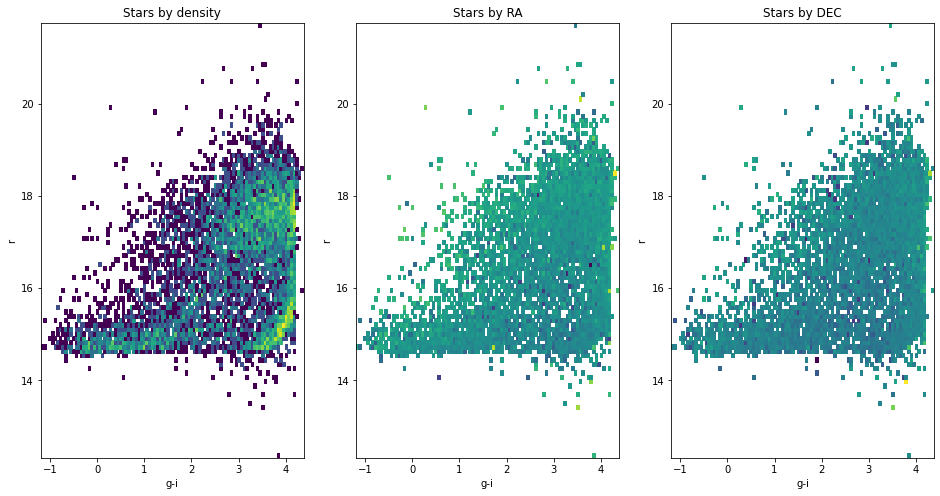

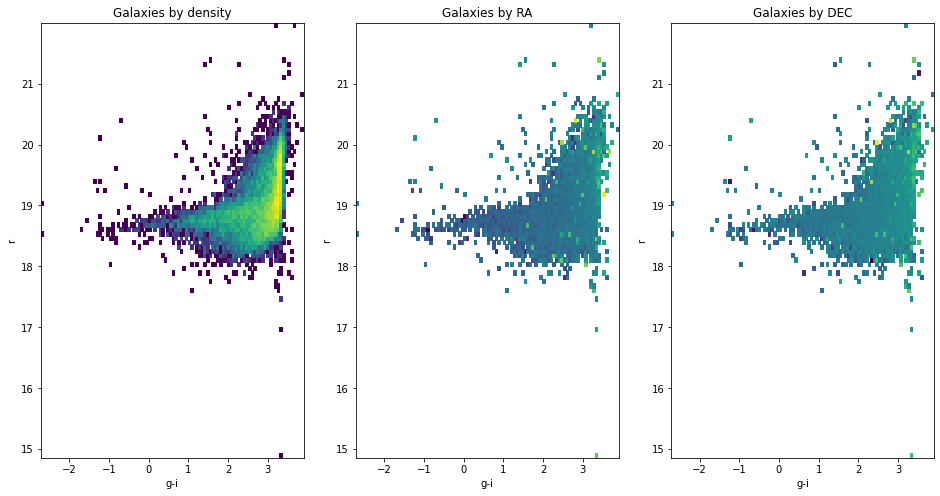

In [91]:
# answer questions:
print('From the r vs. (g-i) plots below, stars and galaxies have similar emission ranges given they both have a triangular shape.')
print('The stars have a wider emission range becuase thier plots take up a larger area than the galaxies do. They in general are also brighter.')

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astroML.stats import binned_statistic_2d

hdul = fits.open('data/HLC.RA_03_to_04.fits.gz')
#hdul.info()
###### Import data from fits file
data = hdul[1].data['MEAN_PSFMAG']
o = hdul[1].data['MEAN_OBJECT_TYPE']
ra = hdul[1].data['RA_PM']
dec = hdul[1].data['DEC_PM']
#print(data.shape)
#print(dtype.shape)
#print(ra.shape)
g = data[:,2]
r = data[:,3]
i = data[:,4]

## clear crap data
ind = (g > 0) & (r > 0) & (i > 0) & (o > 0) & (ra > 0) & (dec > 0)
g = g[ind]
r = r[ind]
i = i[ind]
o = o[ind]
ra = ra[ind]
dec = dec[ind]

# split by stars and galaxies
decS = dec[np.nonzero(o>5)]
decG = dec[np.nonzero(o<=5)]
raS = ra[np.nonzero(o>5)]
raG = ra[np.nonzero(o<=5)]
gS = g[np.nonzero(o>5)]
gG = g[np.nonzero(o<=5)]
rS = r[np.nonzero(o>5)]
rG = r[np.nonzero(o<=5)]
iS = i[np.nonzero(o>5)]
iG = i[np.nonzero(o<=5)]

## PLOT FOR STARS
s1N,xed,yed = np.histogram2d(gS-iS,rS,bins=100)
xS,yS = np.meshgrid(xed,yed)
fig1 = plt.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,3,1)
ax1.set_xlabel('g-i')
ax1.set_ylabel('r')
ax1.title.set_text('Stars by density')
ax1.pcolormesh(xS,yS,np.log10(s1N))
#lev1 = np.linspace(0,np.log10(s1N.max()),3)
#ax1.contour(np.log10(s1N),lev1,colors='k', linewidth=1,extent=[xed[0],xed[-1],yed[0],yed[-1]])
#ax1.show()

s2N,xed2,yed2 = binned_statistic_2d(gS-iS,rS,raS,bins=100)
xS2,yS2 = np.meshgrid(xed2,yed2)
ax2 = fig1.add_subplot(1,3,2)
ax2.set_xlabel('g-i')
ax2.set_ylabel('r')
ax2.title.set_text('Stars by RA')
ax2.pcolormesh(xS2,yS2,np.log10(s2N))

s3N,xed3,yed3 = binned_statistic_2d(gS-iS,rS,decS,bins=100)
xS3,yS3 = np.meshgrid(xed3,yed3)
ax3 = fig1.add_subplot(1,3,3)
ax3.set_xlabel('g-i')
ax3.set_ylabel('r')
ax3.title.set_text('Stars by DEC')
ax3.pcolormesh(xS3,yS3,np.log10(s3N))


## PLOT FOR GALAXIES
g1N,xed,yed = np.histogram2d(gG-iG,rG,bins=100)
xG,yG = np.meshgrid(xed,yed)
fig2 = plt.figure(figsize=(16,8))
ax1b = fig2.add_subplot(1,3,1)
ax1b.set_xlabel('g-i')
ax1b.set_ylabel('r')
ax1b.title.set_text('Galaxies by density')
ax1b.pcolormesh(xG,yG,np.log10(g1N))

g2N,xed2,yed2 = binned_statistic_2d(gG-iG,rG,raG,bins=100)
xG2,yG2 = np.meshgrid(xed2,yed2)
ax2b = fig2.add_subplot(1,3,2)
ax2b.set_xlabel('g-i')
ax2b.set_ylabel('r')
ax2b.title.set_text('Galaxies by RA')
ax2b.pcolormesh(xG2,yG2,np.log10(g2N))

g3N,xed3,yed3 = binned_statistic_2d(gG-iG,rG,decG,bins=100)
xG3,yG3 = np.meshgrid(xed3,yed3)
ax3b = fig2.add_subplot(1,3,3)
ax3b.set_xlabel('g-i')
ax3b.set_ylabel('r')
ax3b.title.set_text('Galaxies by DEC')
ax3b.pcolormesh(xG3,yG3,np.log10(g3N))


# Problem 2

### Comparing distributions to a standard normal distribution

Load the `IntroStat_demo.csv` file in the data directory (use `pandas` or `astropy` or whatever you like).

Estimate the sample mean and variance of the suspiciously named `mag.outlier` column.

Make a Q-Q plot (I suggest statsmodels.graphics.gofplots.qqplot) of the `mag.outlier` column and over plot a line with `Y = Mean + Sigma*X` on it. 

Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)

Overplot that line passing through the data.

Now try the same thing with `mag.het`. Describe what you found?

What happens if you rescale the data? Subtract of the sample mean of `mag.het` and divide by `mag.het.error`. Now repeat the Q-Q plot with this quantity. 

Describe what's going on.

The mag.outlier mean is: 18.56209670050581
The mag.outlier variance is 0.0051831390123150125
mag.outlier: first quartile: 18.537979227450897
mag.outler: thrid quartile: 18.56328299432643


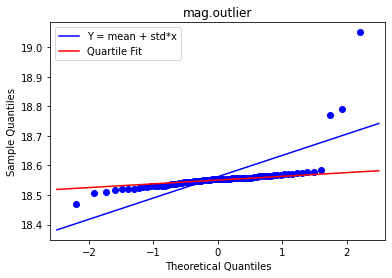

The mag.het mean is: 18.547552918674437
The mag.het variance is 0.002083389377520299
mag.het: first quartile: 18.527056641485675
mag.het: thrid quartile: 18.569977244535576


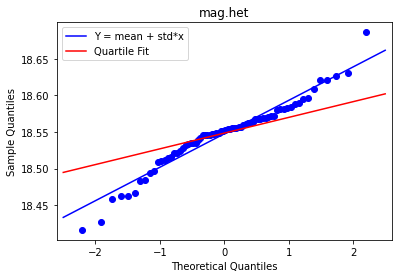

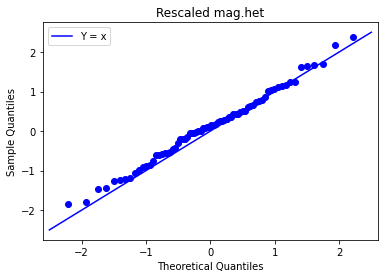

Rescaling the data using the method above shifts the sample quantiles to the same value as the theoretical quantiles.
This rescaling eliminates the need for a Y=mx+b fit line. You 


In [8]:
from astropy.io import ascii
import statsmodels.api as sm

file = ascii.read('data/IntroStat_demo.csv', format='csv')
#print(file[0])
#print(file['mag.outlier'])
print('The mag.outlier mean is:',np.mean(file['mag.outlier'][1:73]))
print('The mag.outlier variance is',np.var(file['mag.outlier'][1:73]))
x = np.linspace(-2.5,2.5)
yo = np.mean(file['mag.outlier'][1:73]) + np.std(file['mag.outlier'][1:73])*x
qo1 = np.quantile(file['mag.outlier'][1:73],0.25)
qo3 = np.quantile(file['mag.outlier'][1:73],0.75)
print('mag.outlier: first quartile:',qo1)
print('mag.outler: thrid quartile:',qo3)

yoq = (qo3-qo1)/2*(x+1)+qo1 
fig3 = sm.qqplot(file['mag.outlier'][1:73])
plt.plot(x,yo,color='blue',label='Y = mean + std*x')
plt.plot(x,yoq,color='red',label='Quartile Fit')
plt.title("mag.outlier")
plt.legend()
plt.show()

print('The mag.het mean is:',np.mean(file['mag.het'][1:73]))
print('The mag.het variance is',np.var(file['mag.het'][1:73]))
yh = np.mean(file['mag.het'][1:73]) + np.std(file['mag.het'][1:73])*x
qh1 = np.quantile(file['mag.het'][1:73],0.25)
qh3 = np.quantile(file['mag.het'][1:73],0.75)
print('mag.het: first quartile:',qh1)
print('mag.het: thrid quartile:',qh3)
print('The mag.het data has fewer true outliers, so the Y = mx + b line fits better than with the mag.outlier data.')
yhq = (qh3-qh1)/2*(x+1)+qh1 
fig4 = sm.qqplot(file['mag.het'][1:73])
plt.plot(x,yh,color='blue',label='Y = mean + std*x')
plt.plot(x,yhq,color='red',label='Quartile Fit')
plt.title("mag.het")
plt.legend()
plt.show()

scal_magHet = (file['mag.het']-np.mean(file['mag.het']))/file['mag.het.error']
fig5 = sm.qqplot(scal_magHet)
plt.plot(x,x,color='blue',label='Y = x')
plt.title('Rescaled mag.het')
plt.legend()
plt.show()
print('Rescaling the data using the method above shifts the sample quantiles to the same value as the theoretical quantiles.')
print('This rescaling eliminates the need for a Y=mx+b fit line. You ')

# Problem 3

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.

Split the data into LMC and SMC, and then again by mode F and 1, and plot the `W` on the y-axis vs `log(P1)` on x.
Fit or estimate straight lines to each of the four samples (you can use `statsmodels` `astropy` `scipy` `numpy`....)
(Yes, we've not covered fitting straight lines. That's OK.)

Compute the residuals of each sample to it's respective line. Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

Plot the residuals color coded by if they are positive or negative vs RA and Dec (just like a Hess diagram in Problem 1). What do you see?

The residuals for each dataset do NOT look like a normal distribution. They are generally skewed in the positive direction. 
I believe this is due to the fact that dimmer objects (distant, dimmer, for whatever reason) are more difficult to image, and were missed or ignored.
-------------
Both the histograms and the color coded residual graphs give you simililar results. They are difficult to see, but the residuals/colors are slightly weighted to values above zero.
-------------


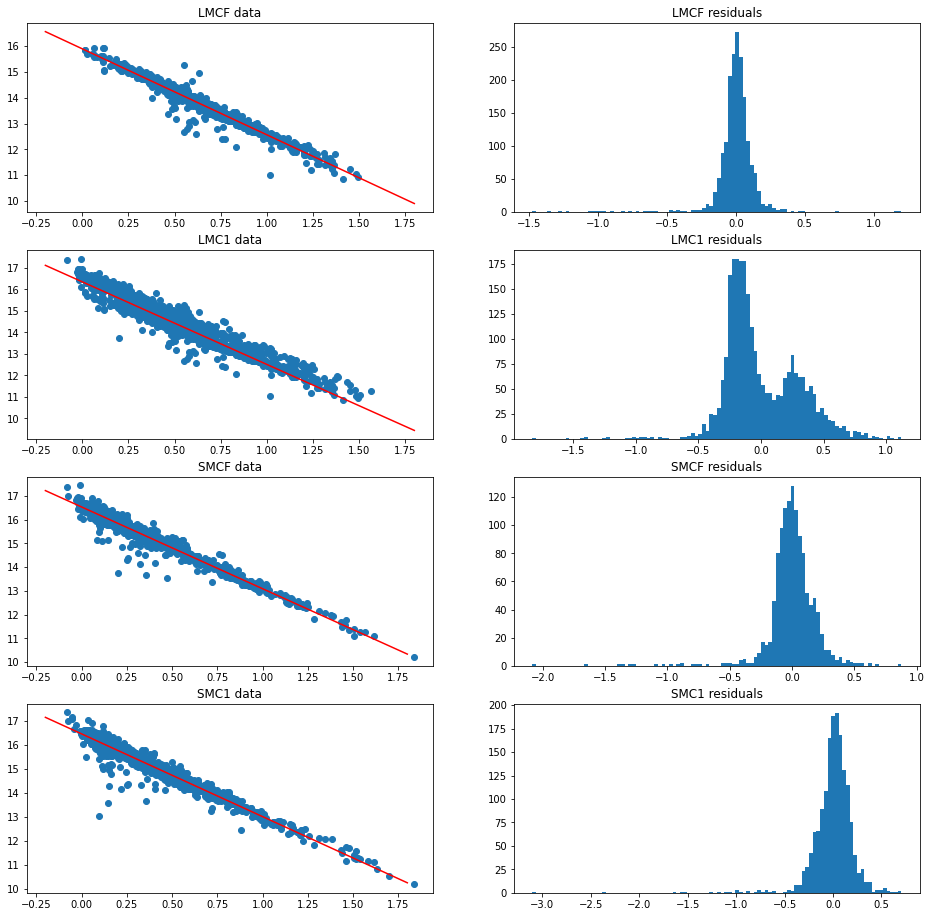

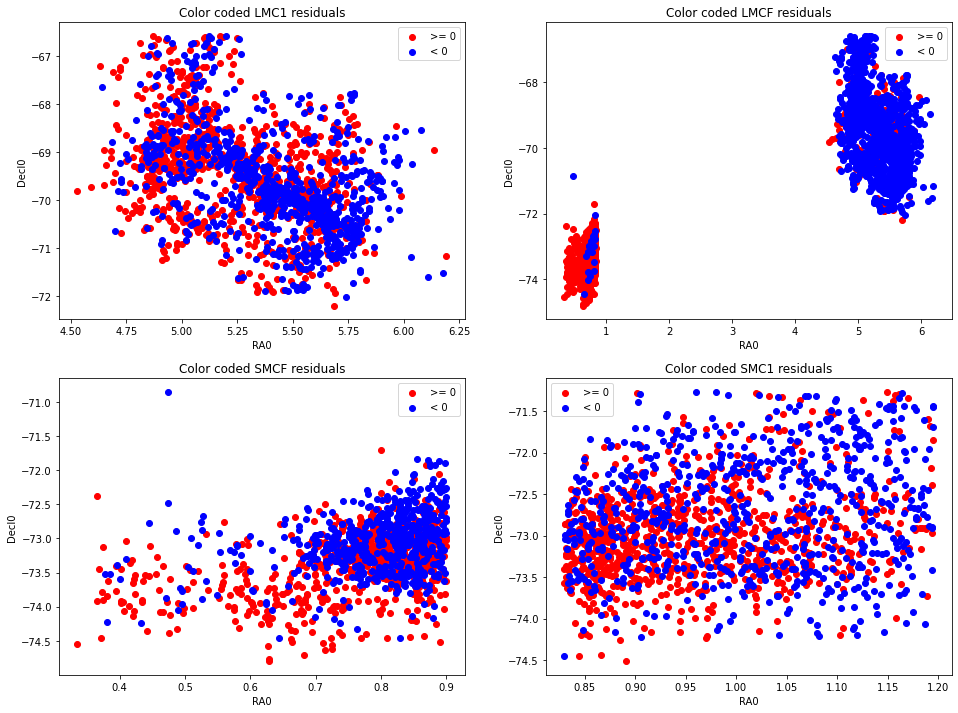

In [98]:
import scipy.stats as stats

cephFile = ascii.read('data/Cepheids.csv')
#print(cephFile[0])

lmc_indeces = np.nonzero(cephFile['Cloud'] == 'LMC')
lmcf_indeces = np.nonzero(cephFile[lmc_indeces]['Mode'] == 'F')
lmc1_indeces =  np.nonzero(cephFile[lmc_indeces]['Mode'] == '1')
smc_indeces = np.nonzero(cephFile['Cloud'] == 'SMC')
smcf_indeces = np.nonzero(cephFile[smc_indeces]['Mode'] == 'F')
smc1_indeces = np.nonzero(cephFile[smc_indeces]['Mode'] == '1')

lmcf = cephFile[lmcf_indeces]
smcf = cephFile[lmc1_indeces]
lmc1 = cephFile[smcf_indeces]
smc1 = cephFile[smc1_indeces]

figP3 = plt.figure(figsize=(16, 16))
ax1p3 = figP3.add_subplot(4,2,1)
ax5p3 = figP3.add_subplot(4,2,2)
ax2p3 = figP3.add_subplot(4,2,3)
ax6p3 = figP3.add_subplot(4,2,4)
ax3p3 = figP3.add_subplot(4,2,5)
ax7p3 = figP3.add_subplot(4,2,6)
ax4p3 = figP3.add_subplot(4,2,7)
ax8p3 = figP3.add_subplot(4,2,8)

x = np.linspace(-0.2,1.8)
m1,b1 = np.polyfit(lmcf['logP1'],lmcf['W'],deg=1)
y1 = m1*x+b1
m2,b2 = np.polyfit(lmc1['logP1'],lmc1['W'],deg=1)
y2=m2*x+b2
m3,b3 = np.polyfit(smcf['logP1'],smcf['W'],deg=1)
y3=m3*x+b3
m4,b4 = np.polyfit(smc1['logP1'],smc1['W'],deg=1)
y4=m4*x+b4
ax1p3.scatter(lmcf['logP1'],lmcf['W'])
ax1p3.plot(x,y1,color='red')
ax1p3.title.set_text('LMCF data')
ax2p3.scatter(lmc1['logP1'],lmc1['W'])
ax2p3.plot(x,y2,color='red')
ax2p3.title.set_text('LMC1 data')
ax3p3.scatter(smcf['logP1'],smcf['W'])
ax3p3.plot(x,y3,color='red')
ax3p3.title.set_text('SMCF data')
ax4p3.scatter(smc1['logP1'],smc1['W'])
ax4p3.plot(x,y4,color='red')
ax4p3.title.set_text('SMC1 data')

res1 = lmcf['W']-(m1*lmcf['logP1']+b1)
res2 = lmc1['W']-(m2*lmc1['logP1']+b2)
res3 = smcf['W']-(m3*smcf['logP1']+b3)
res4 = smc1['W']-(m4*smc1['logP1']+b4)
ax5p3.hist(res1,bins=100)
ax5p3.title.set_text('LMCF residuals')
ax6p3.hist(res2,bins=100)
ax6p3.title.set_text('LMC1 residuals')
ax7p3.hist(res3,bins=100)
ax7p3.title.set_text('SMCF residuals')
ax8p3.hist(res4,bins=100)
ax8p3.title.set_text('SMC1 residuals')

print('The residuals for each dataset do NOT look like a normal distribution. They are generally skewed in the positive direction. ')
print('I believe this is due to the fact that dimmer objects (distant, dimmer, for whatever reason) are more difficult to image, and were missed or ignored.')
print('-------------')

fig2p3 = plt.figure(figsize=(16,12))
f2ax1p3 = fig2p3.add_subplot(2,2,1)
f2ax1p3.title.set_text('Color coded LMC1 residuals')
f2ax2p3 = fig2p3.add_subplot(2,2,2)
f2ax2p3.title.set_text('Color coded LMCF residuals')
f2ax3p3 = fig2p3.add_subplot(2,2,3)
f2ax3p3.title.set_text('Color coded SMCF residuals')
f2ax4p3 = fig2p3.add_subplot(2,2,4)
f2ax4p3.title.set_text('Color coded SMC1 residuals')


f2ax1p3.scatter(lmcf['RA0'][np.nonzero(res1>=0)],lmcf['Decl0'][np.nonzero(res1>=0)],color='red',label='>= 0')
f2ax1p3.scatter(lmcf['RA0'][np.nonzero(res1<0)],lmcf['Decl0'][np.nonzero(res1<0)],color='blue',label='< 0')
f2ax1p3.set_xlabel('RA0')
f2ax1p3.set_ylabel('Decl0')
f2ax1p3.legend()

f2ax2p3.scatter(lmc1['RA0'][np.nonzero(res2>=0)],lmc1['Decl0'][np.nonzero(res2>=0)],color='red',label='>= 0')
f2ax2p3.scatter(lmc1['RA0'][np.nonzero(res2<0)],lmc1['Decl0'][np.nonzero(res2<0)],color='blue',label='< 0')
f2ax2p3.set_xlabel('RA0')
f2ax2p3.set_ylabel('Decl0')
f2ax2p3.legend()

f2ax3p3.scatter(smcf['RA0'][np.nonzero(res3>=0)],smcf['Decl0'][np.nonzero(res3>=0)],color='red',label='>= 0')
f2ax3p3.scatter(smcf['RA0'][np.nonzero(res3<0)],smcf['Decl0'][np.nonzero(res3<0)],color='blue',label='< 0')
f2ax3p3.set_xlabel('RA0')
f2ax3p3.set_ylabel('Decl0')
f2ax3p3.legend()

f2ax4p3.scatter(smc1['RA0'][np.nonzero(res4>=0)],smc1['Decl0'][np.nonzero(res4>=0)],color='red',label='>= 0')
f2ax4p3.scatter(smc1['RA0'][np.nonzero(res4<0)],smc1['Decl0'][np.nonzero(res4<0)],color='blue',label='< 0')
f2ax4p3.set_xlabel('RA0')
f2ax4p3.set_ylabel('Decl0')
f2ax4p3.legend()


print('Both the histograms and the color coded residual graphs give you simililar results. They are difficult to see, but the residuals/colors are slightly weighted to values above zero.')
print('-------------')